* all_688 stores the original released data inside each folder
* aff_neurons stores the affine result inside each brain folder's affine folder
* aff_600 stores all the affine result in the aff_neurons to the single folder

In [4]:
import os
import shutil
# obtained brainlist showing up inside the 417 swc
brain_list = []
for i_swc in os.listdir('/run/media/penglab/FISHZHAO/688_neurons'):
    (filename,extension) = os.path.splitext(i_swc)
    (filename,extension) = os.path.splitext(filename)
    #print(filename.split('_'))
    if filename.split('_')[0] not in brain_list:
        brain_list.append(filename.split('_')[0])

In [6]:
# move the swc to separate brain folder inside the brainfolder
for i_b in brain_list:  
    for i_swc in os.listdir('/run/media/penglab/FISHZHAO/688_neurons'):
        if (i_swc)[-3:]!=("swc"):
            continue
        if i_swc.startswith(i_b):
            (filename,extension) = os.path.splitext(i_swc)
            (filename,extension) = os.path.splitext(filename)
            (filename,extension) = os.path.splitext(filename)
            oldname= '/run/media/penglab/FISHZHAO/688_neurons'+ '/'+ str(i_swc)
            folder= os.path.exists(os.path.join('/home/penglab/Documents/result/all_688',i_b))
            if not folder:         
                os.makedirs(os.path.join('/home/penglab/Documents/result/all_688',i_b))  
            newname= os.path.join('/home/penglab/Documents/result/all_688',i_b)+ '/'+ str(i_swc)
            shutil.copyfile(oldname,newname)


### check the total number of original neurons to be operated

In [8]:
c_ori = 0
path = '/home/penglab/Documents/result/all_688'
for i_folder in os.listdir(path):
    temp_path = os.path.join('/home/penglab/Documents/result/all_688',i_folder)
    for i_swc in os.listdir(temp_path):
        if i_swc.find("ano.swc") > 0:
            c_ori = c_ori +1
print('Originally we have '+ str(c_ori)+' neurons')

Originally we have 688 neurons


### Check the total number of affined neurons: 600

In [16]:
c_aff = 0
path = '/home/penglab/Documents/result/aff_neurons'
for i_brain in os.listdir(path):
    for i_folder in os.listdir(os.path.join('/home/penglab/Documents/result/aff_neurons',i_brain)):
        if i_folder =='affine':
            temp_path = os.path.join(os.path.join('/home/penglab/Documents/result/aff_neurons',i_brain),i_folder)
            for i_swc in os.listdir(temp_path):
                if i_swc.find("affine.swc") > 0:
                    c_aff = c_aff +1
print('Now we have '+ str(c_aff)+' affined neurons')
if c_aff == 600:
    for i_brain in os.listdir(path):
        for i_folder in os.listdir(os.path.join('/home/penglab/Documents/result/aff_neurons',i_brain)):
            if i_folder =='affine':
                temp_path = os.path.join(os.path.join('/home/penglab/Documents/result/aff_neurons',i_brain),i_folder)
                for i_swc in os.listdir(temp_path):
                    if i_swc.find("affine.swc") > 0:
                        oldname= os.path.join(temp_path,i_swc)
                        folder= '/home/penglab/Documents/result/aff_600'
                        if not folder:         
                            os.makedirs('/home/penglab/Documents/result/aff_600')  
                        newname= os.path.join('/home/penglab/Documents/result/aff_600',i_swc)
                        shutil.copyfile(oldname,newname)

ONow we have 600 affined neurons


In [11]:
import pandas as pd
import os
brain_regis = pd.read_excel(os.path.join('/home/penglab/Documents/result', 'brain_registration.xlsx'), index_col=[0], skiprows=[0],
                            names=['ID', 'y_initial', 'x_initial', 'z_initial', 'y_after', 'x_after', 'z_after',
                                   'ration', 'flip', 'flip_axis'])
brain_regis.loc[:, 'x_downsample'] = brain_regis.loc[:, 'x_initial'] / brain_regis.loc[:, 'x_after']
brain_regis.loc[:, 'y_downsample'] = brain_regis.loc[:, 'y_initial'] / brain_regis.loc[:, 'y_after']
brain_regis.loc[:, 'z_downsample'] = brain_regis.loc[:, 'z_initial'] / brain_regis.loc[:, 'z_after']
brain_regis.drop_duplicates(keep='first', inplace=True)
brain_regis.fillna(value='NA', inplace=True)
brain_regis = brain_regis.loc[~brain_regis.index.duplicated(keep='first')]
brain_regis.loc[:, 'x_initial'] = brain_regis.loc[:, 'x_initial'].astype(float)
brain_regis.loc[:, 'y_initial'] = brain_regis.loc[:, 'y_initial'].astype(float)
brain_regis.loc[:, 'z_initial'] = brain_regis.loc[:, 'z_initial'].astype(float)

In [12]:
brain_regis

,y_initial,x_initial,z_initial,y_after,x_after,z_after,ration,flip,flip_axis,x_downsample,y_downsample,z_downsample
ID,,,,,,,,,,,,
17109,35000.0,22793.0,10533.0,547,356,659,xy64z16,0,NA,64.0253,63.9854,15.9833
17302,54600.0,34412.0,9847.0,853,537,615,xy64z16,0,NA,64.0819,64.0094,16.0114
17541,54600.0,39328.0,11073.0,426,307,346,xy128z32,0,NA,128.104,128.169,32.0029
17542,54600.0,34748.0,11333.0,426,271,354,x128.221y128z32,0,NA,128.221,128.169,32.0141
17545,54600.0,35989.0,10750.0,853,562,671,xy64z16,0,NA,64.0374,64.0094,16.0209
17781,54600.0,34722.0,11021.0,426,271,344,x128.125y128.17z32,0,NA,128.125,128.169,32.0378
17782,28000.0,45000.0,11786.0,437,703,736,xy64z16,1,Y,64.0114,64.0732,16.0136
17787,24275.0,36400.0,11478.0,189,284,358,x128.17y128.44z32,0,NA,128.169,128.439,32.0615
17788,27188.0,35000.0,11120.0,212,273,347,128.205y128.245z32,1,Y,128.205,128.245,32.0461


### Check the resulted affinement neurons generated by me

In [121]:
aff_folder = '/home/penglab/Documents/result/aff_neurons'
aff_Problem = []

for i_brain in os.listdir(aff_folder):
    
    if int(i_brain) not in brain_regis.index.tolist():
        print('\nSkip '+str(i_brain))
        continue
    print('\n--------- Process brain '+str(i_brain))
    print('------------- '+str(len(os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine'))))+' neurons in total')
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    error_c = 0
    
    for iter_swc in os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(os.path.join(aff_folder, i_brain),'affine'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        neuron_info
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            flag_E = True
            #print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            flag_E = True
            #print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_c = error_c +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_c/len(os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine'))),2))+'% neurons have error')


--------- Process brain 17302
------------- 93 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17545
------------- 87 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17781
------------- 4 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17782
------------- 6 neurons in total
------------- 100.0% neurons have error

Skip 18452

--------- Process brain 18454
------------- 85 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18455
------------- 80 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18457
------------- 110 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18458
------------- 43 neurons in total
------------- 0.0% neurons have error

Skip 18462

Skip 18463

--------- Process brain 18464
------------- 25 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18465
-----

### Check the resulted affinement neurons generated by AHU

In [120]:
aff_folder = '/home/penglab/Documents/result/2_affine_swc'
aff_Problem = []

for i_brain in os.listdir(aff_folder):
    
    if int(i_brain) not in brain_regis.index.tolist():
        print('\nSkip '+str(i_brain))
        continue
    print('\n--------- Process brain '+str(i_brain))
    print('------------- '+str(len(os.listdir(os.path.join(aff_folder, i_brain))))+' neurons in total')
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    error_c = 0
    
    for iter_swc in os.listdir(os.path.join(aff_folder, i_brain)):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(aff_folder, i_brain),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        neuron_info
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of x is '+ str(max(swc['x']))+', while the boundary is '+str(x_aff_bound))
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of y is '+ str(max(swc['y']))+', while the boundary is '+str(y_aff_bound))     
            flag_E = True#print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of z is '+ str(max(swc['z']))+', while the boundary is '+str(z_aff_bound))
            flag_E = True#print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_c = error_c +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_c/len(os.listdir(os.path.join(aff_folder, i_brain))),2))+'% neurons have error')


--------- Process brain 18464
------------- 25 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17782
------------- 6 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18465
------------- 61 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18458
------------- 43 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17302
------------- 93 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18455
------------- 80 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18869
------------- 6 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17545
------------- 87 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17781
------------- 4 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18457
------------- 110 neurons in total
----------

### Count number of finished neuron until 11 am

In [65]:
import shutil
List_fini_11am = []

for i_brain in os.listdir('/run/media/penglab/FISHZHAO/result_5Dec'):
    for i_folder in os.listdir(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain)):
        if i_folder.lower() == 'stps':
            temp_path = os.path.join(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain),'stps')
        else:
            continue
        for i_swc in os.listdir(temp_path):
            if i_swc.endswith("stps.swc"):
                (neuronname,extension) = os.path.splitext(i_swc)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                List_fini_11am.append(neuronname)
                oldname = os.path.join(temp_path, i_swc)
                newname = os.path.join('/home/penglab/Documents/result/stps_5Dec', i_swc)
                shutil.copyfile(oldname,newname)
print('Till now, have finished '+str(len(List_fini_11am)))

Till now, have finished 119


### Count number of finished neuron until 15 pm at Pan's left desk

In [72]:
import shutil
List_fini_15pm = []

for i_brain in os.listdir('/run/media/penglab/FISHZHAO/result_5Dec'):
    for i_folder in os.listdir(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain)):
        if i_folder.lower() == 'stps':
            temp_path = os.path.join(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain),'stps')
        else:
            continue
        for i_swc in os.listdir(temp_path):
            if i_swc.endswith("stps.swc"):
                (neuronname,extension) = os.path.splitext(i_swc)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                List_fini_15pm.append(neuronname)
                print(neuronname)
                oldname = os.path.join(temp_path, i_swc)
                newname = os.path.join('/home/penglab/Documents/result/stps_5Dec', i_swc)
                shutil.copyfile(oldname,newname)
print('Till now, have finished '+str(len(List_fini_15pm)))

18465_00136
18465_00145
18465_00041
18465_00003
18465_00006
18458_00578
18458_00580
18458_00586
18458_00612
18457_00041
18457_00043
18457_00044
18457_00045
18457_00046
18457_00047
18457_00048
18457_00049
18457_00051
18457_00052
18457_00053
18457_00054
18457_00055
18457_00056
18457_00057
18457_00058
18457_00059
18457_00061
18457_00062
18457_00063
18457_00028
18457_00029
18457_00030
18457_00031
18457_00032
18457_00008
18457_00009
18457_00010
18457_00012
18457_00013
18457_00014
18457_00015
18457_00017
18457_00018
18457_00019
18457_00023
18457_00025
18457_00027
18457_00001
18457_00002
18457_00003
18457_00004
18457_00005
18457_00006
18457_00007
18457_00064
18457_00066
18457_00069
18457_00072
18457_00073
18457_00074
18457_00075
18457_00076
18457_00077
18455_00002
18455_00182
236174_04129_04228_X16214_Y10304_QCed
236174_04229_04328_X13663_Y8589_QCed
236174_04266_X13848_Y8550_Finalized_QCed
236174_4029_04128_X13079_Y8858_QCed
236174_4429_04528_X13147_Y8003_QCed
236174_4647_X16405_Y27845_QCed
2

### Count number of finished neuron until 19 pm at Lieannare(4)

In [193]:
import shutil
List_fini_19pm = []

for i_brain in os.listdir('/run/media/penglab/FISHZHAO/result_5Dec'):
    for i_folder in os.listdir(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain)):
        if i_folder.lower() == 'stps':
            temp_path = os.path.join(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain),'stps')
        else:
            continue
        for i_swc in os.listdir(temp_path):
            if i_swc.endswith("stps.swc"):
                (neuronname,extension) = os.path.splitext(i_swc)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                if i_swc not in os.listdir('/home/penglab/Documents/result/stps_5Dec'):
                    List_fini_15pm.append(neuronname)
                    print(neuronname)
                    oldname = os.path.join(temp_path, i_swc)
                    newname = os.path.join('/home/penglab/Documents/result/stps_5Dec', i_swc)
                    shutil.copyfile(oldname,newname)
print('Till now, have finished '+str(len(List_fini_19pm)))

Till now, have finished 0


### Count number of finished neuron until 19 pm at APan's left desk(9)

In [194]:
import shutil
List_fini_19pmp = []

for i_brain in os.listdir('/run/media/penglab/FISHZHAO/result_5Dec'):
    for i_folder in os.listdir(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain)):
        if i_folder.lower() == 'stps':
            temp_path = os.path.join(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain),'stps')
        else:
            continue
        for i_swc in os.listdir(temp_path):
            if i_swc.endswith("stps.swc"):
                (neuronname,extension) = os.path.splitext(i_swc)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                if i_swc not in os.listdir('/home/penglab/Documents/result/stps_5Dec'):
                    List_fini_19pmp.append(neuronname)
                    print(neuronname)
                    oldname = os.path.join(temp_path, i_swc)
                    newname = os.path.join('/home/penglab/Documents/result/stps_5Dec', i_swc)
                    shutil.copyfile(oldname,newname)
print('Till now, have finished '+str(len(List_fini_19pmp)))

17782_00005
17782_00006
18454_00064
18454_00065
18454_00066
18454_00068
18454_00069
18454_00071
17781_00001
Till now, have finished 0


### Count number of finished neuron until 20 pm at APan's left desk(9)

In [213]:
import shutil
List_fini_20pm = []

for i_brain in os.listdir('/run/media/penglab/FISHZHAO/result_5Dec'):
    for i_folder in os.listdir(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain)):
        if i_folder.lower() == 'stps':
            temp_path = os.path.join(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain),'stps')
        else:
            continue
        for i_swc in os.listdir(temp_path):
            if i_swc.endswith("stps.swc"):
                (neuronname,extension) = os.path.splitext(i_swc)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                if i_swc not in os.listdir('/home/penglab/Documents/result/stps_5Dec'):
                    List_fini_20pm.append(neuronname)
                    print(neuronname)
                    oldname = os.path.join(temp_path, i_swc)
                    newname = os.path.join('/home/penglab/Documents/result/stps_5Dec', i_swc)
                    shutil.copyfile(oldname,newname)
print('Till now, have finished '+str(len(List_fini_20pm)))

18454_00072
18454_00075
18454_00093
Till now, have finished 3


### Count all finished neurons under folder result_5Dec

In [224]:
import shutil
List_fini_all = []
for i_swc in os.listdir('/home/penglab/Documents/result/stps_5Dec'):
    if i_swc.endswith("stps.swc"):
        (neuronname,extension) = os.path.splitext(i_swc)
        (neuronname,extension) = os.path.splitext(neuronname)
        (neuronname,extension) = os.path.splitext(neuronname)
        (neuronname,extension) = os.path.splitext(neuronname)
        List_fini_all.append(neuronname)
        #print(neuronname)
print('Till now, have finished '+str(len(List_fini_all)))

Till now, have finished 256


## Divide the to_be_warpped affined neurons in different brains

In [226]:
for i in os.listdir('/home/penglab/Documents/result/old_to_warp'):
    (neuronname,extension) = os.path.splitext(i)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname in List_fini_all:
        print('Have finished '+str(neuronname))
        os.remove(os.path.join('/home/penglab/Documents/result/old_to_warp',i))
print('Still have '+ str(len(os.listdir('/home/penglab/Documents/result/old_to_warp')))+' neurons to warp at 9 am on 6Dec')
brain_list = []
for i_swc in os.listdir('/home/penglab/Documents/result/old_to_warp'):
    (filename,extension) = os.path.splitext(i_swc)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    #print(filename.split('_'))
    if filename.split('_')[0] not in brain_list:
        brain_list.append(filename.split('_')[0])
# move the swc to separate brain folder inside the affine folder
for i_b in brain_list:  
    for i_swc in os.listdir('/home/penglab/Documents/result/old_to_warp'):
        if (i_swc)[-3:]!=("swc"):
            continue
        if i_swc.startswith(i_b):
            (filename,extension) = os.path.splitext(i_swc)
            (filename,extension) = os.path.splitext(filename)
            (filename,extension) = os.path.splitext(filename)
            oldname_aff = '/home/penglab/Documents/result/old_to_warp'+ '/'+ str(i_swc)
            folder_aff = os.path.exists(os.path.join(os.path.join('/home/penglab/Documents/result/old_to_warp',i_b),'affine'))
            if not folder_aff:         
                os.makedirs(os.path.join(os.path.join('/home/penglab/Documents/result/old_to_warp',i_b),'affine'))  
            newname_aff = os.path.join(os.path.join('/home/penglab/Documents/result/old_to_warp',i_b),'affine')+ '/'+ str(i_swc)
            shutil.move(oldname_aff,newname_aff)


Have finished 17109_01701_01800_X8048_Y22277_QCed
Have finished 17109_1801_1900_X6698_Y12550_QCed
Have finished 17109_01901_02000_X9602_Y10508_QCed
Have finished 17109_2301_2400_X8535_Y23051_QCed
Have finished 17109_2301_2400_X9418_23665_QCed
Have finished 17109_2401_2500_X8977_24184_QCed
Have finished 17109_2401_2500_X9338_Y2394_QCed
Have finished 17109_2401_2500_X9695_Y9693_QCed
Have finished 17109_2401_2500_X9954_Y9122_QCed
Have finished 17109_2601_2700_X9498_Y8169_QCed
Have finished 17109_2601-2700-X10213-Y8783_QCed
Have finished 17109_3101_3200_X10824_Y7188_QCed
Have finished 17109_3701_03800_X9228_Y26684_QCed
Have finished 17109_4101_4200_X6753_Y6197_QCed
Have finished 17109_6201_6300_X4328_Y6753_QCed
Have finished 17109_6301_6400_X4756_Y24516_QCed
Have finished 17109_6401_6500_X7641_Y3978_QCed
Have finished 17109_6401_6500_X7989_Y3767_QCed
Have finished 17109_6501_6600_X6997_Y4287_QCed
Have finished 17109_6601_6700_X4384_Y7436_QCed
Have finished 17109_6601_6700_X5417_Y25287_QCed

In [216]:
# generate empty brain for convenience
for i_b in brain_list:  
    folder_aff = os.path.exists(os.path.join(os.path.join('/home/penglab/Documents/result/empty',i_b),'affine'))
    if not folder_aff:         
        os.makedirs(os.path.join(os.path.join('/home/penglab/Documents/result/empty',i_b),'affine'))  
            

### Compare the newly  affinement result with the previous one

In [83]:
swc_c 

5

In [86]:
previous_path = '/home/penglab/Documents/result/old_aff'
current_path = '/home/penglab/Documents/result/aff_600'
brain_L = []
for i in os.listdir('/home/penglab/Documents/result/aff_600'):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)

In [114]:
All_neuron = []#688
path = '/home/penglab/Documents/result/all_688'
for i_folder in os.listdir('/home/penglab/Documents/result/all_688'):
    for i_swc in os.listdir(os.path.join('/home/penglab/Documents/result/all_688',i_folder)):
        (neuronname,extension) = os.path.splitext(i_swc)
        (neuronname,extension) = os.path.splitext(neuronname)
        (neuronname,extension) = os.path.splitext(neuronname)
        (neuronname,extension) = os.path.splitext(neuronname)
        All_neuron.append(neuronname)

AHU_aff = []#671
for i_swc in list(set(os.listdir(previous_path)) - set(os.listdir(current_path))):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    AHU_aff.append(neuronname)
    #if neuronname not in All_neuron:
        #print(neuronname)
print('There are '+ str(len(list(set(All_neuron) - set(AHU_aff)))) + ' neurons that are in SEU but not in AHU')
print('\t'+str(list(set(All_neuron) - set(AHU_aff))))
print('\nThere are '+ str(len(list(set(AHU_aff) - set(All_neuron)))) + ' neurons that are in SEU but not in AHU')
print('\t'+str(list(set(AHU_aff) - set(All_neuron))))

There are 88 neurons that are in SEU but not in AHU
	['18463_00062', '18463_00074', '18452_00013', '18463_00034', '18462_00020', '18462_00042', '18463_00019', '18462_00023', '18463_00029', '18463_00071', '18463_00055', '18462_00015', '18462_00052', '18462_00058', '18463_00069', '18463_00012', '18462_00060', '18462_00025', '18463_00032', '18462_00062', '18462_00044', '18462_00061', '18463_00066', '18463_00039', '18463_00004', '18462_00048', '18462_00035', '18462_00032', '18463_00041', '18462_00016', '18463_00052', '18462_00053', '18463_00021', '18462_00057', '18462_00038', '18463_00016', '18463_00036', '18463_00067', '18462_00031', '18463_00056', '18463_00073', '18463_00001', '18462_00055', '18462_00026', '18463_00061', '18462_00028', '18462_00045', '18462_00059', '18463_00072', '18463_00075', '18462_00054', '18462_00056', '18463_00027', '18462_00030', '18463_00020', '18462_00050', '18463_00046', '18463_00031', '18462_00049', '18463_00003', '18463_00058', '18462_00019', '18462_00063', '

In [109]:
#list(set(All_neuron).intersection(AHU_aff))

There are 88


In [127]:
import numpy as np
compareDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])

iter_i = 1
for i_swc in os.listdir(current_path):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in list(set(All_neuron).intersection(AHU_aff)):
        print('Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    compareDF.loc[iter_i,"brain"] = brain_temp
    compareDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(previous_path):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre = os.path.join(previous_path,i_swc_old)
    path_cur = os.path.join(current_path,i_swc)
    n_skip = 0
    with open(path_pre, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    compareDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    compareDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    compareDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    compareDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    compareDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    compareDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1

Processing neuron 17302_00001
Processing neuron 17302_00002
Processing neuron 17302_00003
Processing neuron 17302_00005
Processing neuron 17302_00006
Processing neuron 17302_00007
Processing neuron 17302_00009
Processing neuron 17302_00010
Processing neuron 17302_00011
Processing neuron 17302_00013
Processing neuron 17302_00014
Processing neuron 17302_00015
Processing neuron 17302_00016
Processing neuron 17302_00017
Processing neuron 17302_00018
Processing neuron 17302_00019
Processing neuron 17302_00020
Processing neuron 17302_00021
Processing neuron 17302_00023
Processing neuron 17302_00024
Processing neuron 17302_00025
Processing neuron 17302_00027
Processing neuron 17302_00030
Processing neuron 17302_00031
Processing neuron 17302_00032
Processing neuron 17302_00033
Processing neuron 17302_00034
Processing neuron 17302_00035
Processing neuron 17302_00036
Processing neuron 17302_00037
Processing neuron 17302_00038
Processing neuron 17302_00039
Processing neuron 17302_00040
Processing

Processing neuron 18455_00004
Processing neuron 18455_00008
Processing neuron 18455_00009
Processing neuron 18455_00012
Processing neuron 18455_00013
Processing neuron 18455_00014
Processing neuron 18455_00015
Processing neuron 18455_00016
Processing neuron 18455_00017
Processing neuron 18455_00018
Processing neuron 18455_00019
Processing neuron 18455_00020
Processing neuron 18455_00021
Processing neuron 18455_00022
Processing neuron 18455_00023
Processing neuron 18455_00026
Processing neuron 18455_00030
Processing neuron 18455_00033
Processing neuron 18455_00041
Processing neuron 18455_00042
Processing neuron 18455_00043
Processing neuron 18455_00045
Processing neuron 18455_00046
Processing neuron 18455_00047
Processing neuron 18455_00048
Processing neuron 18455_00049
Processing neuron 18455_00050
Processing neuron 18455_00106
Processing neuron 18455_00120
Processing neuron 18455_00121
Processing neuron 18455_00122
Processing neuron 18455_00123
Processing neuron 18455_00125
Processing

Processing neuron 18465_00050
Processing neuron 18465_00054
Processing neuron 18465_00078
Processing neuron 18465_00080
Processing neuron 18465_00090
Processing neuron 18465_00111
Processing neuron 18465_00113
Processing neuron 18465_00116
Processing neuron 18465_00117
Processing neuron 18465_00119
Processing neuron 18465_00132
Processing neuron 18465_00136
Processing neuron 18465_00145
Processing neuron 18465_00146
Processing neuron 18465_00152
Processing neuron 18465_00154
Processing neuron 18465_00155
Processing neuron 18465_00156
Processing neuron 18465_00159
Processing neuron 18465_00168
Processing neuron 18465_00205
Processing neuron 18465_00206
Processing neuron 18465_00207
Processing neuron 18465_00209
Processing neuron 18465_00213
Processing neuron 18465_00226
Processing neuron 18465_00233
Processing neuron 18465_00234
Processing neuron 18465_00241
Processing neuron 18465_00246
Processing neuron 18465_00248
Processing neuron 18465_00261
Processing neuron 18465_00264
Processing

[1, 2, 3, 4, 5, 1]

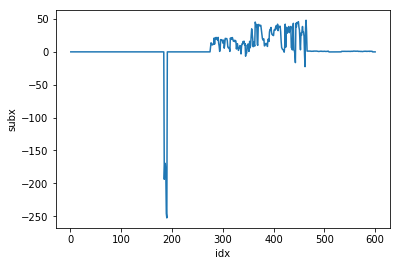

In [189]:
import seaborn as sns
compareDF.loc[:, 'brain'] = compareDF.loc[:, 'brain'].astype(int)
compareDF.loc[:,'idx'] = compareDF.index.tolist()
compareDF.loc[:, 'pre_x'] = compareDF.loc[:, 'pre_x'].astype(float)
compareDF.loc[:, 'pre_y'] = compareDF.loc[:, 'pre_y'].astype(float)
compareDF.loc[:, 'pre_z'] = compareDF.loc[:, 'pre_z'].astype(float)
compareDF.loc[:,'subx'] = compareDF.loc[:,'pre_x'] - compareDF.loc[:,'cur_x']
compareDF.loc[:,'suby'] = compareDF.loc[:,'pre_y'] - compareDF.loc[:,'cur_y']
compareDF.loc[:,'subz'] = compareDF.loc[:,'pre_z'] - compareDF.loc[:,'cur_z']
compareDF.loc[:, 'subx'] = compareDF.loc[:, 'subx'].astype(float)
compareDF.loc[:, 'suby'] = compareDF.loc[:, 'suby'].astype(float)
compareDF.loc[:, 'subz'] = compareDF.loc[:, 'subz'].astype(float)
sns.lineplot(x='idx', y= 'subx',  data=compareDF)

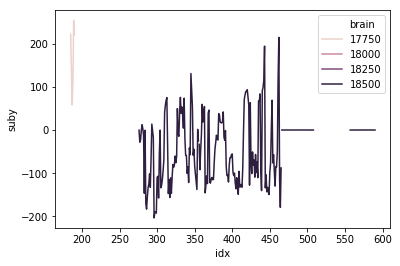

In [179]:
sns.lineplot(x='idx', y= 'suby',hue='brain', data=compareDF[np.abs(compareDF['subx'])>1])

In [180]:
list_x = compareDF[np.abs(compareDF['subx'])>1].index.tolist()
list_y = compareDF[np.abs(compareDF['suby'])>1].index.tolist()
list_z = compareDF[np.abs(compareDF['subz'])>1].index.tolist()
list_x.extend(list_y)
list_x.extend(list_z)
list(set(list_x))

[520,
 557,
 558,
 559,
 560,
 561,
 563,
 564,
 565,
 566,
 581,
 582,
 590,
 599,
 600,
 185,
 186,
 187,
 188,
 189,
 190,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421

In [188]:
sns.lineplot(x='idx', y= 'subx', style= 'brain', data=compareDF.loc[list(set(list_x)),:], palette="Set2")


ValueError: These `style` levels are missing dashes: {'18869'}

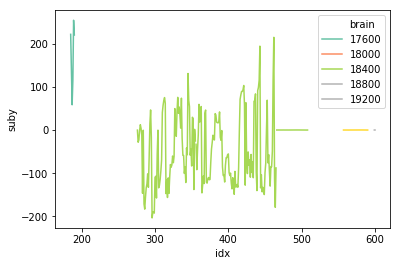

In [182]:
sns.lineplot(x='idx', y= 'suby', hue= 'brain', data=compareDF.loc[list(set(list_x)),:], palette="Set2")


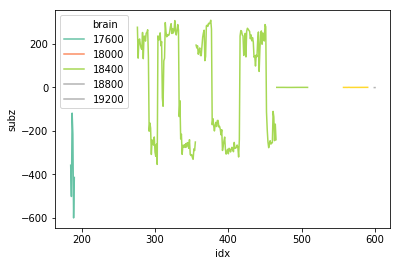

In [183]:
sns.lineplot(x='idx', y= 'subz', hue= 'brain', data=compareDF.loc[list(set(list_x)),:], palette="Set2")


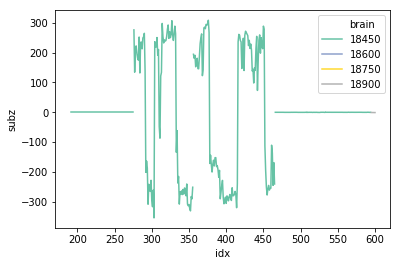

In [191]:
sns.lineplot(x='idx', y= 'subz', hue= 'brain', data=compareDF[compareDF["brain"]>18400], palette="Set2")


## Check the processing of each brain

In [222]:
import os
import shutil
# obtained brainlist showing up inside the 417 swc
brain_list = []
for i_swc in os.listdir('/home/penglab/Documents/result/stps_5Dec'):
    (filename,extension) = os.path.splitext(i_swc)
    (filename,extension) = os.path.splitext(filename)
    #print(filename.split('_'))
    if filename.split('_')[0] not in brain_list:
        brain_list.append(filename.split('_')[0])
# move the swc to separate brain folder inside the brainfolder
for i_b in brain_list:  
    for i_swc in os.listdir('/home/penglab/Documents/result/stps_5Dec'):
        if (i_swc)[-3:]!=("swc"):
            continue
        if i_swc.startswith(i_b):
            (filename,extension) = os.path.splitext(i_swc)
            (filename,extension) = os.path.splitext(filename)
            (filename,extension) = os.path.splitext(filename)
            oldname= '/home/penglab/Documents/result/stps_5Dec'+ '/'+ str(i_swc)
            folder= os.path.exists(os.path.join('/home/penglab/Documents/result/finish_to_folder5Dec',i_b))
            if not folder:         
                os.makedirs(os.path.join('/home/penglab/Documents/result/finish_to_folder5Dec',i_b))  
            newname= os.path.join('/home/penglab/Documents/result/finish_to_folder5Dec',i_b)+ '/'+ str(i_swc)
            shutil.copyfile(oldname,newname)

import os
import shutil
release_path = '/home/penglab/Documents/result/all_688'
generate_path = '/home/penglab/Documents/result/finish_to_folder5Dec'
for i_b in  os.listdir(release_path):
    num_release= len(os.listdir(os.path.join(release_path,i_b)))
    if i_b not in os.listdir(generate_path):
        num_generate = 0
        print('Processing of brain '+ str(i_b)+' is '+ str(round(num_generate/num_release,2)))
        continue
    num_generate = len(os.listdir(os.path.join(generate_path,i_b)))
    print('Processing of brain '+ str(i_b)+' is '+ str(round(num_generate/num_release,2)))





Processing of brain 17302 is 0.13
Processing of brain 17545 is 0.28
Processing of brain 17781 is 0.25
Processing of brain 17782 is 1.0
Processing of brain 18452 is 0.0
Processing of brain 18454 is 0.65
Processing of brain 18455 is 0.14
Processing of brain 18457 is 0.6
Processing of brain 18458 is 0.12
Processing of brain 18462 is 0.0
Processing of brain 18463 is 0.0
Processing of brain 18464 is 0.72
Processing of brain 18465 is 0.11
Processing of brain 18869 is 0.0


### Count number of finished neuron until 9 am on 6 DEc(73)

In [229]:
import shutil
List_fini_9am = []

for i_brain in os.listdir('/run/media/penglab/FISHZHAO/result_5Dec'):
    for i_folder in os.listdir(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain)):
        if i_folder.lower() == 'stps':
            temp_path = os.path.join(os.path.join('/run/media/penglab/FISHZHAO/result_5Dec',i_brain),'stps')
        else:
            continue
        for i_swc in os.listdir(temp_path):
            if i_swc.endswith("stps.swc"):
                (neuronname,extension) = os.path.splitext(i_swc)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                (neuronname,extension) = os.path.splitext(neuronname)
                if i_swc not in os.listdir('/home/penglab/Documents/result/stps_5Dec'):
                    List_fini_9am.append(neuronname)
                    print(neuronname)
                    oldname = os.path.join(temp_path, i_swc)
                    newname = os.path.join('/home/penglab/Documents/result/stps_5Dec', i_swc)
                    shutil.movefile(oldname,newname)
print('Till now, have finished '+str(len(List_fini_9am)))

18465_00136
18465_00145
18465_00041
18465_00003
18465_00006
18465_00209
18465_00213
18458_00578
18458_00580
18458_00586
18458_00612
18458_00249
18457_00041
18457_00043
18457_00044
18457_00045
18457_00046
18457_00047
18457_00048
18457_00049
18457_00051
18457_00052
18457_00053
18457_00054
18457_00055
18457_00056
18457_00057
18457_00058
18457_00059
18457_00061
18457_00062
18457_00063
18457_00028
18457_00029
18457_00030
18457_00031
18457_00032
18457_00008
18457_00009
18457_00010
18457_00012
18457_00013
18457_00014
18457_00015
18457_00017
18457_00018
18457_00019
18457_00023
18457_00025
18457_00027
18457_00001
18457_00002
18457_00003
18457_00004
18457_00005
18457_00006
18457_00007
18457_00064
18457_00066
18457_00069
18457_00072
18457_00073
18457_00074
18457_00075
18457_00076
18457_00077
18454_00142
18454_00143
18454_00144
18454_00145
18454_00146
18454_00147
18457_00091
18457_00096
18457_00097
18457_00098
18457_00099
18457_00101
18457_00102
18457_00103
18457_00106
18457_00108
18457_00120
1845

## Divide the to_be_warpped affined neurons in different brains

In [230]:
for i in os.listdir('/home/penglab/Documents/result/old_to_warp'):
    (neuronname,extension) = os.path.splitext(i)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname in List_fini_all:
        print('Have finished '+str(neuronname))
        os.remove(os.path.join('/home/penglab/Documents/result/old_to_warp',i))
print('Still have '+ str(len(os.listdir('/home/penglab/Documents/result/old_to_warp')))+' neurons to warp at 9 am on 6Dec')
brain_list = []
for i_swc in os.listdir('/home/penglab/Documents/result/old_to_warp'):
    (filename,extension) = os.path.splitext(i_swc)
    (filename,extension) = os.path.splitext(filename)
    (filename,extension) = os.path.splitext(filename)
    #print(filename.split('_'))
    if filename.split('_')[0] not in brain_list:
        brain_list.append(filename.split('_')[0])
# move the swc to separate brain folder inside the affine folder
for i_b in brain_list:  
    for i_swc in os.listdir('/home/penglab/Documents/result/old_to_warp'):
        if (i_swc)[-3:]!=("swc"):
            continue
        if i_swc.startswith(i_b):
            (filename,extension) = os.path.splitext(i_swc)
            (filename,extension) = os.path.splitext(filename)
            (filename,extension) = os.path.splitext(filename)
            oldname_aff = '/home/penglab/Documents/result/old_to_warp'+ '/'+ str(i_swc)
            folder_aff = os.path.exists(os.path.join(os.path.join('/home/penglab/Documents/result/old_to_warp',i_b),'affine'))
            if not folder_aff:         
                os.makedirs(os.path.join(os.path.join('/home/penglab/Documents/result/old_to_warp',i_b),'affine'))  
            newname_aff = os.path.join(os.path.join('/home/penglab/Documents/result/old_to_warp',i_b),'affine')+ '/'+ str(i_swc)
            shutil.move(oldname_aff,newname_aff)


Have finished 17109_01701_01800_X8048_Y22277_QCed
Have finished 17109_1801_1900_X6698_Y12550_QCed
Have finished 17109_01901_02000_X9602_Y10508_QCed
Have finished 17109_2301_2400_X8535_Y23051_QCed
Have finished 17109_2301_2400_X9418_23665_QCed
Have finished 17109_2401_2500_X8977_24184_QCed
Have finished 17109_2401_2500_X9338_Y2394_QCed
Have finished 17109_2401_2500_X9695_Y9693_QCed
Have finished 17109_2401_2500_X9954_Y9122_QCed
Have finished 17109_2601_2700_X9498_Y8169_QCed
Have finished 17109_2601-2700-X10213-Y8783_QCed
Have finished 17109_3101_3200_X10824_Y7188_QCed
Have finished 17109_3701_03800_X9228_Y26684_QCed
Have finished 17109_4101_4200_X6753_Y6197_QCed
Have finished 17109_6201_6300_X4328_Y6753_QCed
Have finished 17109_6301_6400_X4756_Y24516_QCed
Have finished 17109_6401_6500_X7641_Y3978_QCed
Have finished 17109_6401_6500_X7989_Y3767_QCed
Have finished 17109_6501_6600_X6997_Y4287_QCed
Have finished 17109_6601_6700_X4384_Y7436_QCed
Have finished 17109_6601_6700_X5417_Y25287_QCed